In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import utilities


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/tmp/ipykernel_176789/2928747477.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ticker = "AAPL"
df = utilities.load_stock(ticker)
# ticker = 'SPY'
# df = utilities.load_index(ticker)

In [3]:
# Add Indicators

df = utilities.RSI(df, 14)
df = utilities.RSI(df, 28)
df = utilities.RSI(df, 56)
df = utilities.RSI(df, 100)

df = utilities.MACD(df)

df = utilities.EMA(df, 10)
df = utilities.EMA(df, 50)
df = utilities.EMA(df, 200)

df = utilities.SMA(df, 10)
df = utilities.SMA(df, 50)
df = utilities.SMA(df, 100)

df = utilities.BollingerBands(df, 20)
df = utilities.BollingerBands(df, 50)
df = utilities.BollingerBands(df, 100)

df = utilities.ATR(df, 14)
df = utilities.ATR(df, 28)
df = utilities.ATR(df, 56)

df = utilities.OBV(df)

df = utilities.VWAP(df)

df = utilities.MFI(df, 14)
df = utilities.MFI(df, 28)
df = utilities.MFI(df, 56)

# df = utilities.market_hours_only(df)
# df = utilities.time_to_numeric(df)

In [4]:
df.head()

,timestamp,open,high,low,close,volume,ticker,date,time,minute,...,sma50,sma100,bb_upper,bb_lower,atr14,atr28,atr56,obv,vwap,mfi
0,2005-01-03 08:02:00,1.1518,1.1518,1.1518,1.1518,304360,AAPL,2005-01-03,08:02:00,482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.151800,NaN
1,2005-01-03 08:03:00,1.1625,1.1627,1.1625,1.1627,16800,AAPL,2005-01-03,08:03:00,483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16800,1.152367,NaN
2,2005-01-03 08:04:00,1.1634,1.1661,1.1634,1.1661,161504,AAPL,2005-01-03,08:04:00,484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178304,1.156661,NaN
3,2005-01-03 08:07:00,1.1645,1.1645,1.1643,1.1643,50400,AAPL,2005-01-03,08:07:00,487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178304,1.157389,NaN
4,2005-01-03 08:08:00,1.1634,1.1643,1.1634,1.1643,16800,AAPL,2005-01-03,08:08:00,488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178304,1.157591,NaN


In [5]:
### Heuristic 1: Value of next n bars

# Create a column called "h1", which repserents how many of the next closes after this one are higher than the current close.
# The window is 390*5, to mean the next 5 days, so the last 100 values will be NaN.

days = 1

window = (390*days) - 1 # Adjusted the window size

# Create a column called "value"
df['h1'] = df['close'].rolling(window=window).apply(lambda x: np.mean(x > x.iloc[-1])) 
df['h1'] = df['h1'].shift(-window)

In [6]:
df.head()

,timestamp,open,high,low,close,volume,ticker,date,time,minute,...,sma100,bb_upper,bb_lower,atr14,atr28,atr56,obv,vwap,mfi,h1
0,2005-01-03 08:02:00,1.1518,1.1518,1.1518,1.1518,304360,AAPL,2005-01-03,08:02:00,482,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1.151800,NaN,0.511568
1,2005-01-03 08:03:00,1.1625,1.1627,1.1625,1.1627,16800,AAPL,2005-01-03,08:03:00,483,...,NaN,NaN,NaN,NaN,NaN,NaN,16800,1.152367,NaN,0.508997
2,2005-01-03 08:04:00,1.1634,1.1661,1.1634,1.1661,161504,AAPL,2005-01-03,08:04:00,484,...,NaN,NaN,NaN,NaN,NaN,NaN,178304,1.156661,NaN,0.491003
3,2005-01-03 08:07:00,1.1645,1.1645,1.1643,1.1643,50400,AAPL,2005-01-03,08:07:00,487,...,NaN,NaN,NaN,NaN,NaN,NaN,178304,1.157389,NaN,0.406170
4,2005-01-03 08:08:00,1.1634,1.1643,1.1634,1.1643,16800,AAPL,2005-01-03,08:08:00,488,...,NaN,NaN,NaN,NaN,NaN,NaN,178304,1.157591,NaN,0.455013


In [7]:
df.describe()

,timestamp,open,high,low,close,volume,minute,rsi14,rsi28,rsi56,...,sma100,bb_upper,bb_lower,atr14,atr28,atr56,obv,vwap,mfi,h1
count,3117301,3.117301e+06,3.117301e+06,3.117301e+06,3.117301e+06,3.117301e+06,3.117301e+06,3.117248e+06,3.117273e+06,3.117245e+06,...,3.117202e+06,3.117202e+06,3.117202e+06,3.117288e+06,3.117274e+06,3.117246e+06,3.117301e+06,3.117301e+06,3.117246e+06,3.116912e+06
mean,2015-03-08 17:59:47.118221568,5.209352e+01,5.211114e+01,5.207556e+01,5.209342e+01,5.948984e+05,7.549671e+02,5.042516e+01,5.042580e+01,5.042444e+01,...,5.209200e+01,5.230839e+01,5.187562e+01,3.930846e-02,3.930859e-02,3.930877e-02,6.795914e+11,7.925264e+00,5.068651e+01,4.716749e-01
min,2005-01-03 08:02:00,1.118400e+00,1.119600e+00,6.011000e-01,1.118400e+00,0.000000e+00,6.200000e+01,0.000000e+00,1.016000e+00,3.142400e+00,...,1.126400e+00,1.133300e+00,1.075800e+00,0.000000e+00,1.000000e-04,3.000000e-04,0.000000e+00,1.132057e+00,1.295986e-01,0.000000e+00
25%,2010-07-15 13:19:00,9.239600e+00,9.243200e+00,9.236100e+00,9.239600e+00,8.760000e+03,5.920000e+02,3.981480e+01,4.303350e+01,4.510280e+01,...,9.237500e+00,9.283500e+00,9.199700e+00,6.600000e-03,6.900000e-03,7.300000e-03,5.561730e+11,4.182041e+00,4.208137e+01,1.208226e-01
50%,2015-05-08 08:28:00,2.666750e+01,2.667500e+01,2.666000e+01,2.666750e+01,1.321600e+05,7.540000e+02,5.000000e+01,5.017390e+01,5.027420e+01,...,2.667510e+01,2.677625e+01,2.655555e+01,1.540000e-02,1.570000e-02,1.600000e-02,7.950513e+11,8.050282e+00,5.070089e+01,4.498715e-01
75%,2020-03-10 13:47:00,7.324250e+01,7.328680e+01,7.320500e+01,7.323750e+01,5.740360e+05,9.170000e+02,6.097560e+01,5.772120e+01,5.566340e+01,...,7.322823e+01,7.385930e+01,7.280187e+01,4.280000e-02,4.360000e-02,4.460000e-02,8.681452e+11,1.064518e+01,5.933703e+01,8.200514e-01
max,2024-01-26 19:49:00,1.995800e+02,1.996200e+02,1.994400e+02,1.995800e+02,2.272700e+08,1.201000e+03,1.000000e+02,1.000000e+02,9.822970e+01,...,1.991041e+02,1.999375e+02,1.986597e+02,2.496100e+00,1.749100e+00,1.433000e+00,9.074838e+11,1.586559e+01,9.986199e+01,9.974293e-01
std,NaN,5.729886e+01,5.731743e+01,5.727998e+01,5.729876e+01,1.370481e+06,2.151388e+02,1.568899e+01,1.118142e+01,8.149163e+00,...,5.729622e+01,5.752143e+01,5.707230e+01,6.318785e-02,6.051516e-02,5.817882e-02,2.512702e+11,4.060747e+00,1.388814e+01,3.508831e-01


In [8]:
filename = 'enriched_{}.csv'.format(ticker)
df.to_csv(filename, index=False)

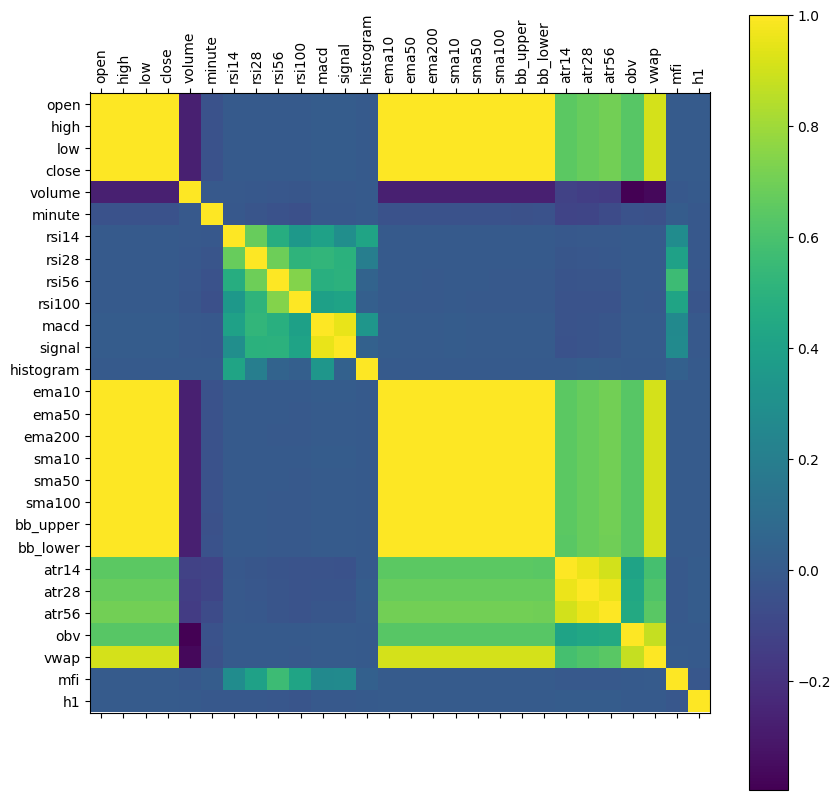

In [9]:
# show the correlation matrix

df = df.drop(columns=['timestamp', 'ticker', 'date', 'time'])

correlation_matrix = df.corr()
plt.matshow(correlation_matrix)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

plt.show()